In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


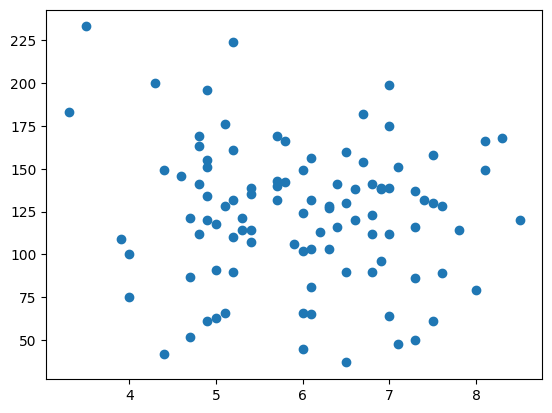

In [32]:
plt.scatter(df['cgpa'],df['iq'])

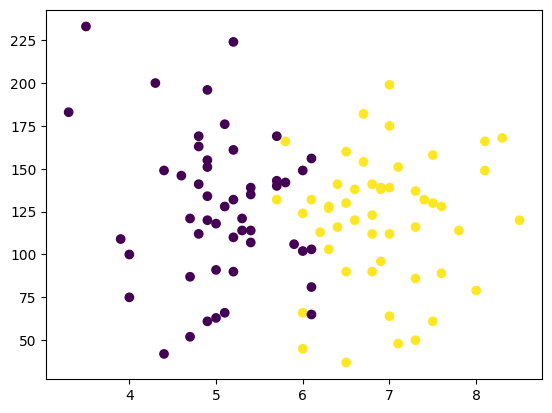

In [35]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [43]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [45]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [46]:
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [113]:
X_train

,cgpa,iq
28,5.2,90.0
97,6.7,182.0
74,6.7,154.0
3,7.4,132.0
6,5.7,143.0
...,...,...
58,8.0,79.0
12,5.4,139.0
60,6.9,139.0
14,6.1,103.0


In [114]:
Y_train

,placement
28,0
97,1
74,1
3,1
6,0
...,...
58,1
12,0
60,1
14,0


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [116]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
clf=LogisticRegression()

In [119]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [120]:
Y_out = clf.predict(X_test)

In [121]:
Y_test

,placement
64,1
10,1
47,0
50,0
95,0
55,1
23,0
94,0
1,0
96,0


In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(Y_test,Y_out)

0.9

In [124]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

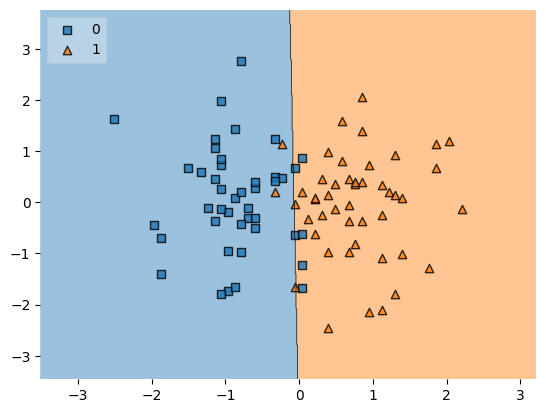

In [126]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [127]:
import pickle

In [130]:
pickle.dump(clf,open('model.pkl','wb'))